In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("student_data.csv")

In [3]:
# Prepare the data for modeling
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['Gender', 'Department', 'Boarding_or_Day',
                                             'Guardian_Education', 'Guardian_Relationship',
                                             'Min_Teacher_Education'])

# normalize continuous features with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cont_cols = ['Age', 'Attendance_Score', 'Computer_Hours', 'Lesson_Hours', 'Mental_Health_Score', 'Guardian_Income', 'Avg_Teacher_Years_of_Experience']
data_encoded[cont_cols] = scaler.fit_transform(data_encoded[cont_cols])

# Define features and target variable
X = data_encoded.drop(['ID', 'Pass/Fail', 'Pass_Likelihood'], axis=1)
y = data_encoded['Pass/Fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression model: {accuracy:.2f}')

Accuracy of Logistic Regression model: 0.89


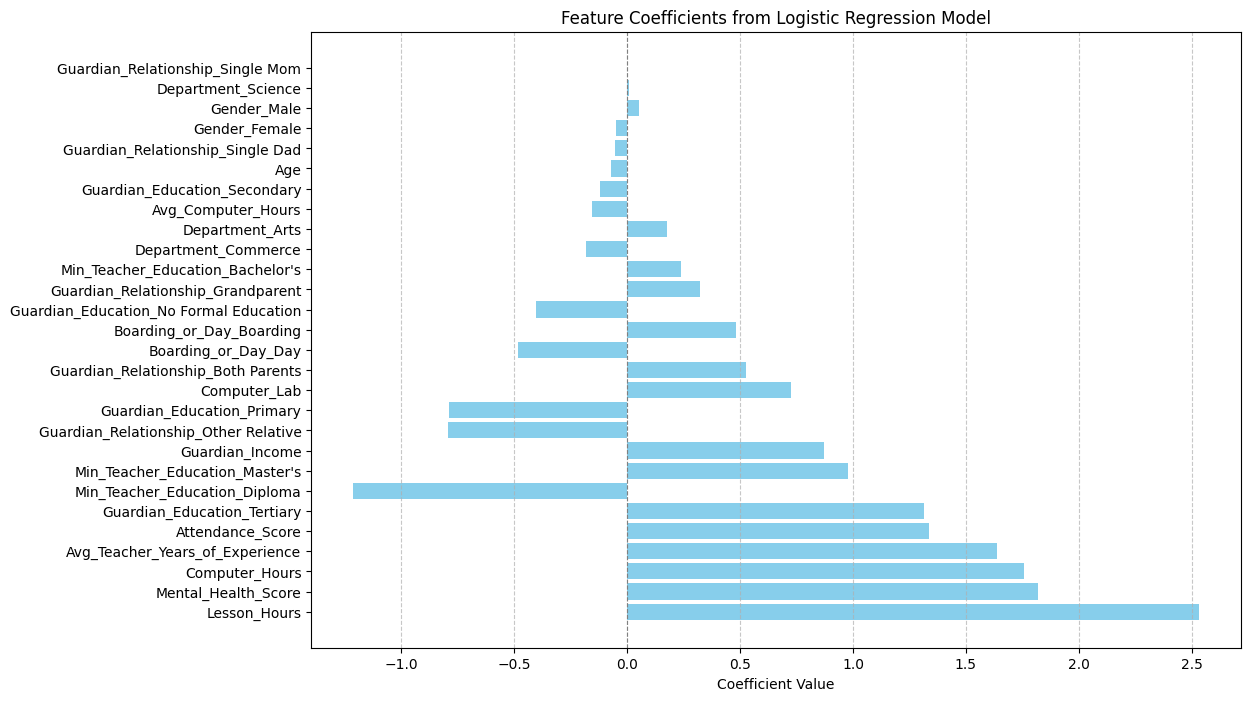

In [4]:
import matplotlib.pyplot as plt

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Get feature names
feature_names = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by their absolute values
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients from Logistic Regression Model')
plt.axvline(0, color='grey', lw=0.8, linestyle='--')  # Add a vertical line at x=0
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [5]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)